<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 5. Karst
## Oxygen-isotope ration (3-sinks model)
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany* 

In this notebook, we will extent the classical Rayleigh fractionation model to **three sinks**, which
we then use to model the fractionation of **oxygen isotopes** in a solution precipitating calcite.

We therefore first discuss precipitation of calcite from a thin water film running down a stalagmite:

We recall: 
- Water enriched in atmospheric carbon dioxide seeps down. the higher carbon-dioxide
concentration in the soil elevated the CO$_2$ concentration. 
- Once the water reaches limestone, calcite is dissolved according to
$$
CaCO_3 + H_2O + CO_2 <=> Ca^{2+} + 2 HCO_3^-
$$
until the calcium equilibrium concentration is reached.
- Both calcium and bicarbonate move down wihtin the solution.
- In an air-filled cave, CO$_2$ concentration is lower, the solution becomes super-saturated,
and calcite precipitates.

<img src="images/precipitation_isotopes.jpg">

Considering **oxygen** now, oxygen is contained in the bicarbonate (HCO$_3^-$), and upon precipitation
migrates both to the solid calcite (CaCO$_3$) and the cave atmosphere (CO$_2$), but also
remains in the bicarbonate! For the oxygen, we thus 
have **two sinks**, the atmosphere and the calcite, and a **buffer**, the water!

During precipitation the **oxygen-isotope ratio** is changed. This is what we want to model.

We first load the `python` libraries `numpy` and `matplotlib`.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def change_fonts():
    SMALL_SIZE = 15
    MEDIUM_SIZE = 20
    BIGGER_SIZE = 25

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
change_fonts()

## Three sinks and buffer reservoir

We continue with Rayleigh fractionation with **three sinks and buffer reservoir**.

<img src="images/rayleigh_3sinks.jpg">

Again the number of particles $N$ and the isotope ratio $R$ in the original reservoir (left side).
Additionally, we consider the water reservoir $W$ on the left side, with the water-isotope ratio $R_W$.
This reservoir accounts for the exchange reaction water-bicarbonate:
$$
H_2^{16}O + HC^{18}O_3^- \leftrightarrow
H_2^{18}O + HC(^{16}O^{18}O_2)^-
$$

Once fractionation starts, we need to consider three sinks (right side), which obtain the partitioned
amount of molecules, with partition factors $f_1$, $f_2$ and $f_3$, and $f_1+f_2+f_3=1$.

----
### Balance equation
As before, balancing the left and right sides results in
$$
N R = (N+\frac{dN}{dt}\Delta t)(R+dR) - \frac{dN}{dt}\Delta t f_1 \alpha_1 R
                                      - \frac{dN}{dt}\Delta t f_2 \alpha_2 R
                                      - \frac{dN}{dt}\Delta t f_3 \alpha_3 R
                                      + \frac{di}{dt}\Delta t \alpha_k R
                                      - \frac{du}{dt}\Delta t \alpha'_k R_W
$$
That looks much more complicated! 
We have introduced the isotope ratio in the water reservoir, $R_W$, which remains constant, because
the reservoir is large, and a forward and backward exchange rate,
$\frac{di}{dt}$ and $\frac{du}{dt}$.
We assume equilibrium for the buffer reaction, thus $\frac{di}{dt}=\frac{du}{dt}$.

----
### Numerical solution
Expanding the balance equation and neglecting terms higher order ($dR dN$ is small):
$$
\fbox{$
R_{i} = R_{i-1} + dR_{i-1}
      = R_{i-1} + \frac{R_{i-1}}{N_{i-1}} \left(\sum_i f_i\alpha_i - 1 \right) \left(N_{i}-N_{i-1} \right)
      - \frac{1}{T} \left( R - \frac{\alpha'_k}{\alpha_k} R_W \right) \Delta t
$}
$$
Here $T$ [s] is the **exchange time**, which is defined as:
$$
\frac{1}{T} = \frac{di}{dt} \frac{\alpha_k}{N}
$$

----
## $^{18}$O isotopic fractionation

The fractionation factors for the $\frac{^{138}O}{^{16}O}$ fractionation are taken from
literature sources as functions of temperature:

In [2]:
'''
fractionation factors for 18O fractionation
from Scholz et al. (2009), Dreybrodt(2008)
equilibrium values:
- alpha1: HCO3- -> CaCO3
- alpha2: HCO3- -> CO2
- alpha3: HCO3- -> H2O
kinetical values:
- alpha1k: HCO3- -> CaCO3
- alpha2k: HCO3- -> CO2
- alpha3k: HCO3- -> H2O
'''
def fractionation_factors_oxygen(T=10.):
    Tk = T + 273.15
    alpha1 = 0.9939*Tk/Tk
    alpha2 = 1.0062*Tk/Tk
    alpha3 = 0.9967*Tk/Tk
    
    e18_c4 = np.exp((- 2590000./(Tk**2) - 1.89)/1000)-1   #isotope enrichment factor, HCO3 -> H2O (Beck 2005)
    e18_b5 = np.exp((2520000./(Tk**2) + 12.12)/1000)-1    #isotope enrichment factor, H2O -> CO_2^{aq} (Beck 2005)
    e18_a1 = (-160515./(Tk**2)+1441.76/Tk - 1.9585)/1000 #isotope enrichment factor, CO_2^{g} -> CO_2^{aq} (Thorstenson 2004)
    e18_d1 = np.exp((18030./Tk - 32.42)/1000)-1           #isotope enrichment factor, H2O -> H2O -> CaCO3 (Kim and O'Neil 1997)
    
    alpha1scholz = 1.+((e18_c4+1)*(e18_d1+1))-1;           #isotope enrichment factor, HCO3 -> CaCO3
    alpha2scholz = 1.+((e18_c4+1)*(e18_b5+1)/(e18_a1+1))-1 #isotope enrichment factor, HCO3 -> CO_2{g}
    alpha3scholz = 1.+e18_c4

    #alpha1k = 1.*Tk/Tk
    #alpha2k = 0.988*alpha2
    return alpha1,alpha2,alpha3,alpha1scholz,alpha2scholz,alpha3scholz

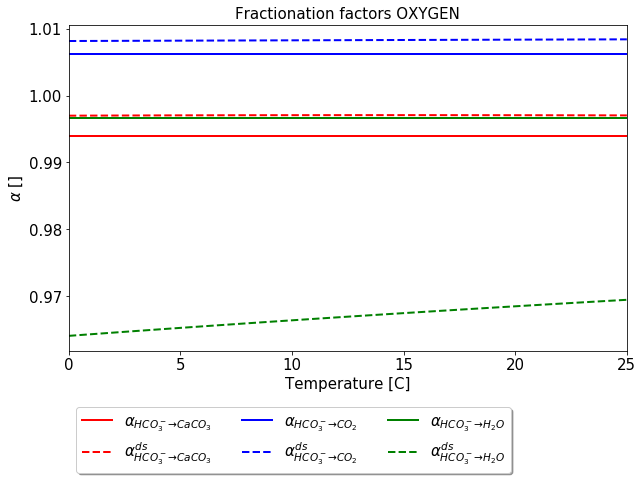

In [3]:
# define temperature range
T   = np.linspace(0,25,26)
# caclulate carbon fractionation factors
alpha1,alpha2,alpha3,alpha1scholz,alpha2scholz,alpha3scholz = fractionation_factors_oxygen(T)
    
# plotting
change_fonts()
plt.figure(figsize=[10,6])
plt.title('Fractionation factors OXYGEN')
plt.xlabel('Temperature [C]')
plt.xlim([0,25])
plt.ylabel('$\\alpha$ []')
#plt.set_ylim([0,1.1*cin])
plt.plot(T,alpha1,linewidth='2',color='red',linestyle='-',label='$\\alpha_{HCO_3^- \\to CaCO_3}$')
plt.plot(T,alpha1scholz,linewidth='2',color='red',linestyle='--',label='$\\alpha^{ds}_{HCO_3^- \\to CaCO_3}$')
plt.plot(T,alpha2,linewidth='2',color='blue',linestyle='-',label='$\\alpha_{HCO_3^- \\to CO_2}$')
plt.plot(T,alpha2scholz,linewidth='2',color='blue',linestyle='--',label='$\\alpha^{ds}_{HCO_3^- \\to CO_2}$')
plt.plot(T,alpha3,linewidth='2',color='green',linestyle='-',label='$\\alpha_{HCO_3^- \\to H_2O}$')
plt.plot(T,alpha3scholz,linewidth='2',color='green',linestyle='--',label='$\\alpha^{ds}_{HCO_3^- \\to H_2O}$')
plt.legend(loc='upper left', bbox_to_anchor=(0.0, -0.15),shadow=True, ncol=3)
plt.show()

----
## Evolution of oxygen-isotope ratio

We calculate the evolution of the calcite layer deposited along a stalagmite.
The incoming solution (drop) has a temperature of $T=10^{\circ}$C and a bi-carbonate concentration of
$[HCO_3^-]=N_0=5$ mol/m$^3$, thus over-saturated with respect to calcium. The bi-carbonate equilibrium
concentration is set to $[HCO_3^-]_{eq}=N_{eq}=1$ mol/m$^3$. The initial isotope ratio is
$R_0=\frac{^{18}O}{^{16}O}=\frac{0.205\%}{99.757\%}\simeq 0.00205$.
$$
R = \frac{^{18}O}{^{16}O}
$$

alphabar:  0.9956836284409135
alphabar:  0.9956836284409135
R0:        0.00207
T:         1000
tau:       300.0


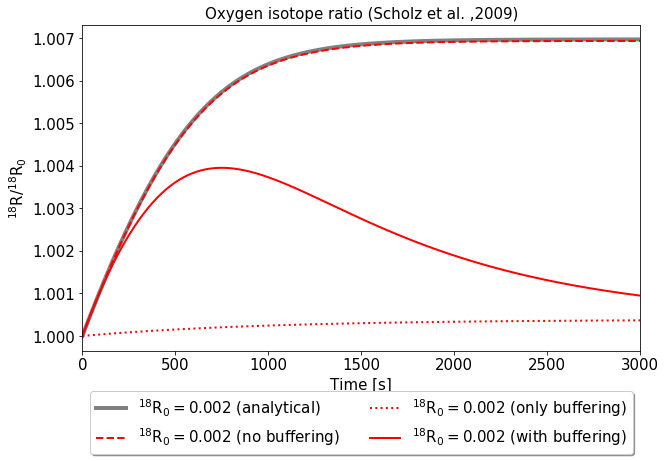

In [9]:
# calculate average fractionation factor
alpha1,alpha2,alpha3,alpha1scholz,alpha2scholz,alpha3scholz = fractionation_factors_oxygen(T=10)
alphabar   = (3*alpha1scholz + 2*alpha2scholz + alpha3scholz)/6.
print('alphabar: ',alphabar)
epsilon18O = alphabar - 1.
alpha18O3  = 1.0354

# define time scales (in s)
t = np.linspace(0,3000,501)
T1   = 1000
tau1 = 300.

# define bicarbonate concentration (N,N0, im mol/m3) and initial isotope ratio (R0)
R0   = 0.00207 #0.205/99.757
Rwater = 0.002
N0   = 5.
Neq  = 1.

print('alphabar: ',alphabar)
print('R0:       ',R0)
print('T:        ',T1)
print('tau:      ',tau1)


# number of HCO3- particles
N = (N0-Neq)*np.exp(-t/tau1) + Neq
# Fractionation factor analytical
Ra = R0*(N/N0)**epsilon18O
# Fractionation factor numerical
R1n = np.zeros(len(t))
R2n = np.zeros(len(t))
R3n = np.zeros(len(t))
R1n[0] = R0
R2n[0] = R0
R3n[0] = R0
for i in range(1,len(t)):
    R1n[i] = R1n[i-1] + R1n[i-1]/N[i-1]*(N[i]-N[i-1])*epsilon18O
    R2n[i] = R2n[i-1] - 1/T1*(R2n[i-1]-alpha18O3*Rwater)*(t[i]-t[i-1])
    R3n[i] = R3n[i-1] + R3n[i-1]/N[i-1]*(N[i]-N[i-1])*epsilon18O - 1/T1*(R3n[i-1]-alpha18O3*Rwater)*(t[i]-t[i-1])

# plotting
change_fonts()
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlim([0,3000])
ax1.set_title('Oxygen isotope ratio (Scholz et al. ,2009)')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('$^{18}$R/$^{18}$R$_0$')
ax1.plot(t,Ra/R0,linewidth='4',color='grey',label='$^{18}$R$_0=$'+str(round(R0,3))+' (analytical)')
ax1.plot(t,R1n/R0,linewidth='2',linestyle='--',color='red',label='$^{18}$R$_0=$'+str(round(R0,3))+' (no buffering)')
ax1.plot(t,R2n/R0,linewidth='2',linestyle=':',color='red',label='$^{18}$R$_0=$'+str(round(R0,3))+' (only buffering)')
ax1.plot(t,R3n/R0,linewidth='2',color='red',label='$^{18}$R$_0=$'+str(round(R0,3))+' (with buffering)')
ax1.legend(loc='upper left', bbox_to_anchor=(0.0, -0.1),shadow=True, ncol=2)
plt.show()

Replotting in delta notation, using
$$
\delta^{18}O = \delta^{18}O_0 + 1000*(\frac{R}{R_0}-1)
$$
with $\delta^{18}O_0=-4$ permil the oxygen-isotope ratio of the impinging drip:

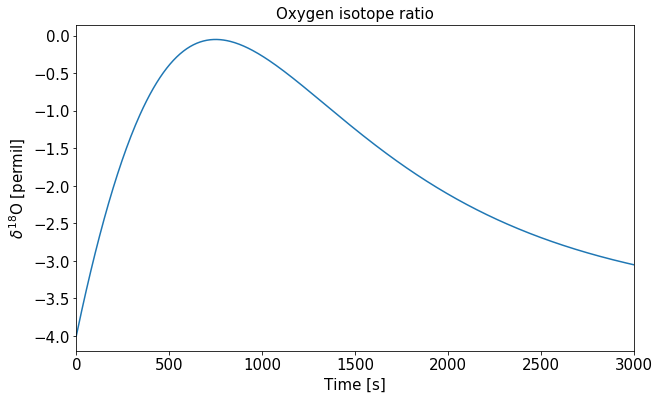

In [10]:
# plotting
change_fonts()
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlim([0,3000])
ax1.set_title('Oxygen isotope ratio')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('$\delta^{18}$O [permil]')
plt.plot(t,-4+(R3n/R0-1)*1000)

Explain, where the time scale comes from ... (see carbon-isotope ratio).

... done